# Capstone Two: Data Wrangling

In [120]:
#Importing all the required packages.

from pathlib import Path
import requests
import numpy as np
import pandas as pd
import os
from pandas_profiling.utils.cache import cache_file
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [61]:
#Downloading the file using file caching

file_name = cache_file(
    "COVID-19 Cases-3",
    "https://prsindia.org/covid-19/cases/download",
)
    
df = pd.read_csv(file_name)

In [62]:
df.head()

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,12/03/2020,India,74,71,3.0,0.0
1,2,13/03/2020,India,75,71,3.0,1.0
2,3,14/03/2020,India,84,72,10.0,2.0
3,4,15/03/2020,India,107,95,10.0,2.0
4,5,16/03/2020,India,114,99,13.0,2.0


In [63]:
df.columns

Index(['S. No.', 'Date', 'Region', 'Confirmed Cases', 'Active Cases',
       'Cured/Discharged', 'Death'],
      dtype='object')

In [64]:
#checking the data for today's date

df[df['Date']=='18/08/2020']

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
159,160,18/08/2020,India,2702742,673166,1977779.0,51797.0
451,452,18/08/2020,Andaman and Nicobar Islands,2445,1091,1325.0,29.0
758,759,18/08/2020,Andhra Pradesh,296609,84777,209100.0,2732.0
1043,1044,18/08/2020,Arunachal Pradesh,2741,843,1893.0,5.0
1329,1330,18/08/2020,Assam,79667,22736,56734.0,197.0
1626,1627,18/08/2020,Bihar,106307,29387,76452.0,468.0
1926,1927,18/08/2020,Chandigarh,2216,1003,1183.0,30.0
2225,2226,18/08/2020,Chhattisgarh,16025,5277,10598.0,150.0
2474,2475,18/08/2020,Dadra and Nagar Haveli and Daman and Diu,1908,447,1459.0,2.0
2781,2782,18/08/2020,Delhi,153367,10852,138301.0,4214.0


In [65]:
#Loading population data into a dataframe called df1

df1=pd.read_csv(r'population_india_census2011.csv')

In [66]:
#Columns that are present in df1
df1.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [67]:
#Merging two dataframes df & df1 to dfm. As we want population column we are merging these two dataframes.

dfm=pd.merge(df, df1, how='inner', on=None, left_on='Region', right_on='State / Union Territory',
         left_index=False, right_index=False, sort=True,
         suffixes=('x', 'y'), copy=True, indicator=False,
         validate=None)

In [68]:
#checking the merged data for single day
dfm[dfm['Date']=='18/08/2020']

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
144,452,18/08/2020,Andaman and Nicobar Islands,2445,1091,1325.0,29.0,34,Andaman and Nicobar Islands,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
451,759,18/08/2020,Andhra Pradesh,296609,84777,209100.0,2732.0,10,Andhra Pradesh,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
736,1044,18/08/2020,Arunachal Pradesh,2741,843,1893.0,5.0,26,Arunachal Pradesh,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17/km2 (44/sq mi),938
1022,1330,18/08/2020,Assam,79667,22736,56734.0,197.0,15,Assam,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)","397/km2 (1,030/sq mi)",954
1319,1627,18/08/2020,Bihar,106307,29387,76452.0,468.0,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
1619,1927,18/08/2020,Chandigarh,2216,1003,1183.0,30.0,32,Chandigarh,1055450,28991,1026459,114 km2 (44 sq mi),"9,252/km2 (23,960/sq mi)",818
1918,2226,18/08/2020,Chhattisgarh,16025,5277,10598.0,150.0,17,Chhattisgarh,25545198,19607961,5937237,"135,191 km2 (52,198 sq mi)",189/km2 (490/sq mi),991
2167,2475,18/08/2020,Dadra and Nagar Haveli and Daman and Diu,1908,447,1459.0,2.0,33,Dadra and Nagar Haveli and Daman and Diu,585764,243510,342254,603 km2 (233 sq mi),"970/km2 (2,500/sq mi)",711
2474,2782,18/08/2020,Delhi,153367,10852,138301.0,4214.0,29,Delhi,16787941,419042,16368899,"1,484 km2 (573 sq mi)","11,297/km2 (29,260/sq mi)",868
2767,3075,18/08/2020,Goa,11994,3825,8058.0,111.0,25,Goa,1458545,551731,906814,"3,702 km2 (1,429 sq mi)","394/km2 (1,020/sq mi)",973


In [69]:
#Here we have all the columns from both df & df1 dataframes. As our dataset becomes clumsy we are dropping the columns which are not useful.

dfm=dfm.drop(['Sno','S. No.','State / Union Territory','Area','Gender Ratio'],axis=1)

In [70]:
#Verifying whether those columns deleted or not.

dfm[dfm['Date']=='18/08/2020']

,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Population,Rural population,Urban population,Density
144,18/08/2020,Andaman and Nicobar Islands,2445,1091,1325.0,29.0,380581,237093,143488,46/km2 (120/sq mi)
451,18/08/2020,Andhra Pradesh,296609,84777,209100.0,2732.0,49577103,34966693,14610410,303/km2 (780/sq mi)
736,18/08/2020,Arunachal Pradesh,2741,843,1893.0,5.0,1383727,1066358,317369,17/km2 (44/sq mi)
1022,18/08/2020,Assam,79667,22736,56734.0,197.0,31205576,26807034,4398542,"397/km2 (1,030/sq mi)"
1319,18/08/2020,Bihar,106307,29387,76452.0,468.0,104099452,92341436,11758016,"1,102/km2 (2,850/sq mi)"
1619,18/08/2020,Chandigarh,2216,1003,1183.0,30.0,1055450,28991,1026459,"9,252/km2 (23,960/sq mi)"
1918,18/08/2020,Chhattisgarh,16025,5277,10598.0,150.0,25545198,19607961,5937237,189/km2 (490/sq mi)
2167,18/08/2020,Dadra and Nagar Haveli and Daman and Diu,1908,447,1459.0,2.0,585764,243510,342254,"970/km2 (2,500/sq mi)"
2474,18/08/2020,Delhi,153367,10852,138301.0,4214.0,16787941,419042,16368899,"11,297/km2 (29,260/sq mi)"
2767,18/08/2020,Goa,11994,3825,8058.0,111.0,1458545,551731,906814,"394/km2 (1,020/sq mi)"


In [71]:
#Deleting the unwanted characters in the data and maintaining it in KM.

dfm['Density']=dfm['Density'].str.replace(r"\(.*\)","")
dfm['Density']=dfm['Density'].str.replace(',','')
dfm['Density']=dfm['Density'].str.replace('/km2','')

In [72]:
dfm.columns

Index(['Date', 'Region', 'Confirmed Cases', 'Active Cases', 'Cured/Discharged',
       'Death', 'Population', 'Rural population', 'Urban population',
       'Density'],
      dtype='object')

In [73]:
#Renaming all the column names to lower case as it will be easy to manipulate the data using column names further.

dfm.columns = ['date','region','confirmed cases','active cases','discharged','death','population','rural population','urban population','density']

In [74]:
#Verifying whether the column names were changed to lower case or not.

dfm.columns

Index(['date', 'region', 'confirmed cases', 'active cases', 'discharged',
       'death', 'population', 'rural population', 'urban population',
       'density'],
      dtype='object')

In [75]:
#checking the top 5 rows of the dataframe.

dfm.head()

,date,region,confirmed cases,active cases,discharged,death,population,rural population,urban population,density
0,27/03/2020,Andaman and Nicobar Islands,1,1,0.0,0.0,380581,237093,143488,46
1,28/03/2020,Andaman and Nicobar Islands,6,6,0.0,0.0,380581,237093,143488,46
2,29/03/2020,Andaman and Nicobar Islands,9,9,0.0,0.0,380581,237093,143488,46
3,30/03/2020,Andaman and Nicobar Islands,9,9,0.0,0.0,380581,237093,143488,46
4,31/03/2020,Andaman and Nicobar Islands,10,10,0.0,0.0,380581,237093,143488,46


In [76]:
#Checking the datatypes of all the columns in our dfm dataframe.

dfm.dtypes

date                 object
region               object
confirmed cases       int64
active cases          int64
discharged          float64
death               float64
population            int64
rural population      int64
urban population      int64
density              object
dtype: object

In [77]:
#As we can see 'discharged' & 'death' columns are in float. We can change it to int as the values of people getting discharged and deaths won't be decimals.

dfm['discharged']=dfm['discharged'].astype('int64')
dfm['death']=dfm['death'].astype('int64')
dfm['density']=dfm['density'].astype(float)

In [78]:
# Verify the datatypes of the columns.

dfm.dtypes

date                 object
region               object
confirmed cases       int64
active cases          int64
discharged            int64
death                 int64
population            int64
rural population      int64
urban population      int64
density             float64
dtype: object

In [79]:
#Now we can see the data type of discharged and death columns is int.

dfm[dfm['date']=='18/08/2020']

,date,region,confirmed cases,active cases,discharged,death,population,rural population,urban population,density
144,18/08/2020,Andaman and Nicobar Islands,2445,1091,1325,29,380581,237093,143488,46.0
451,18/08/2020,Andhra Pradesh,296609,84777,209100,2732,49577103,34966693,14610410,303.0
736,18/08/2020,Arunachal Pradesh,2741,843,1893,5,1383727,1066358,317369,17.0
1022,18/08/2020,Assam,79667,22736,56734,197,31205576,26807034,4398542,397.0
1319,18/08/2020,Bihar,106307,29387,76452,468,104099452,92341436,11758016,1102.0
1619,18/08/2020,Chandigarh,2216,1003,1183,30,1055450,28991,1026459,9252.0
1918,18/08/2020,Chhattisgarh,16025,5277,10598,150,25545198,19607961,5937237,189.0
2167,18/08/2020,Dadra and Nagar Haveli and Daman and Diu,1908,447,1459,2,585764,243510,342254,970.0
2474,18/08/2020,Delhi,153367,10852,138301,4214,16787941,419042,16368899,11297.0
2767,18/08/2020,Goa,11994,3825,8058,111,1458545,551731,906814,394.0


In [80]:
#Checking for Null values in the dataframe

dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10153
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              10154 non-null  object 
 1   region            10154 non-null  object 
 2   confirmed cases   10154 non-null  int64  
 3   active cases      10154 non-null  int64  
 4   discharged        10154 non-null  int64  
 5   death             10154 non-null  int64  
 6   population        10154 non-null  int64  
 7   rural population  10154 non-null  int64  
 8   urban population  10154 non-null  int64  
 9   density           10154 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 872.6+ KB


In [81]:
#Checking for unique values
dfm.nunique()

date                 307
region                35
confirmed cases     7698
active cases        5960
discharged          7235
death               3208
population            35
rural population      35
urban population      35
density               34
dtype: int64

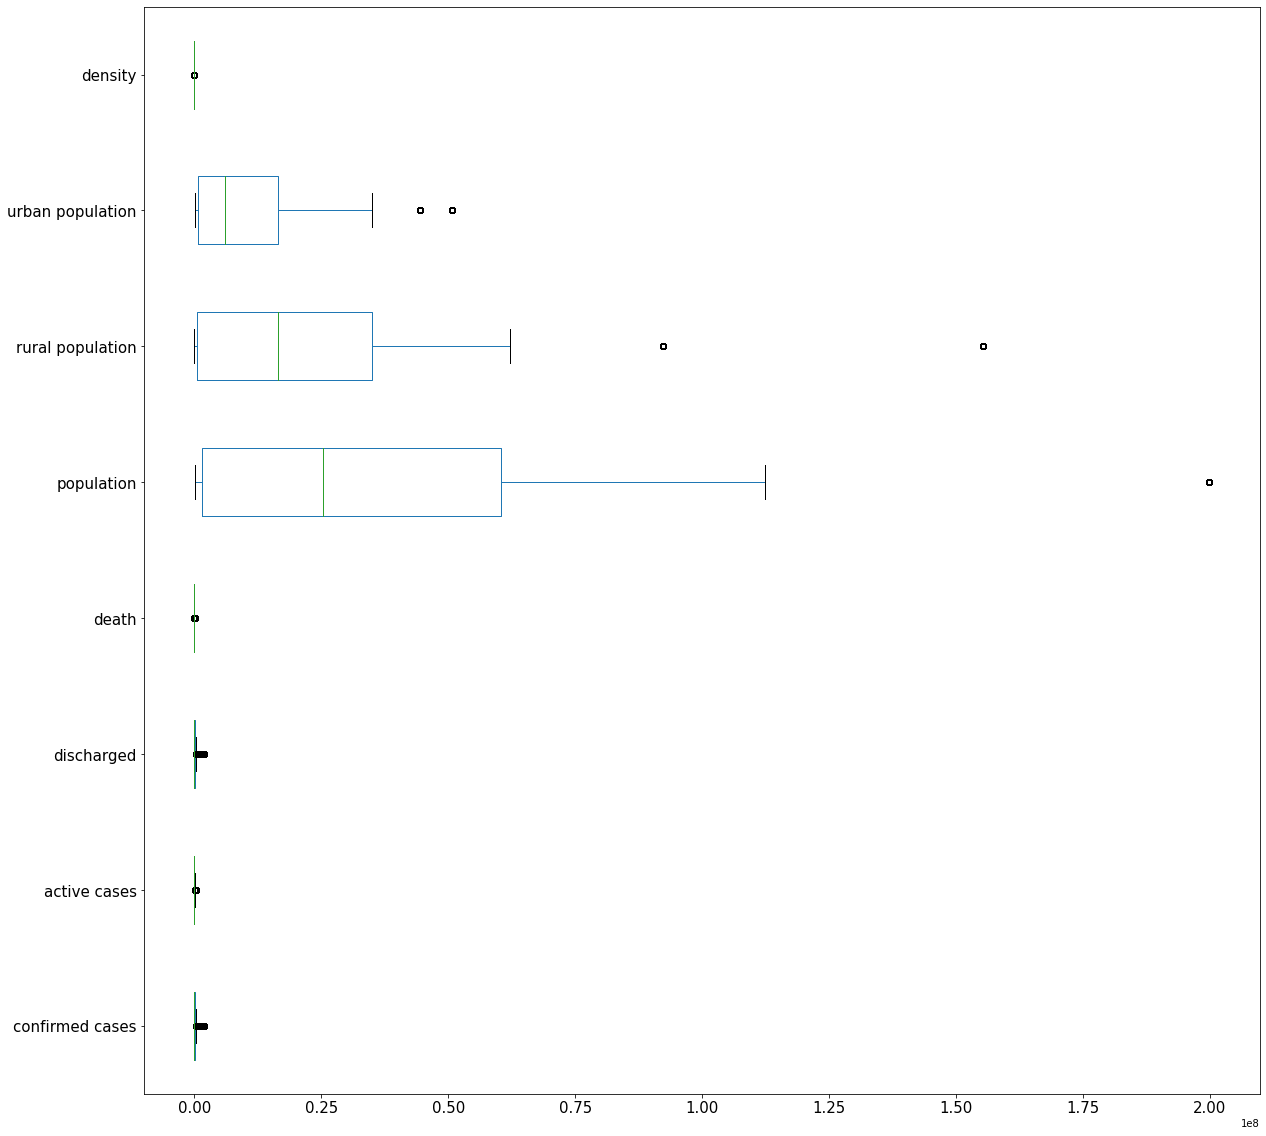

In [84]:
#Checking the boxplot for all the columns in the dataframe

boxplot = dfm.boxplot(grid=False, vert=False,fontsize=15, figsize=(20,20))

In [85]:
#checking the shape of the dataframe dfm
dfm.shape

(10154, 10)

In [ ]:
#For removing the outliers in the data we are calculating Interquartile range.

In [86]:
# Using quantile method we got the first and third quartiles and stored them in Q1 & Q3 variables.

Q1 = dfm.quantile(0.25)

In [87]:
Q3 = dfm.quantile(0.99)

In [88]:
# Calculating the Interquartile range and storing it in variable called IQR

IQR = Q3 - Q1

In [89]:
#Here we are adding all those observations which are not outliers to the new dataframe dfnew

dfnew = dfm[~((dfm < (Q1 - 1.5 * IQR)) |(dfm> (Q3 + 1.5 * IQR))).any(axis=1)]

In [90]:
#Checking the shape of new dataframe dfnew

dfnew.shape

(10154, 10)

# Exploratory Data Analysis - EDA

In [ ]:
#Finding the correlation between the columns in our new dataframe 'dfnew'.

In [91]:
dfnew.corr()

,confirmed cases,active cases,discharged,death,population,rural population,urban population,density
confirmed cases,1.000000,0.648657,0.995920,0.913697,0.392112,0.307327,0.533512,0.014109
active cases,0.648657,1.000000,0.577687,0.675608,0.379928,0.289381,0.537525,-0.014423
discharged,0.995920,0.577687,1.000000,0.896607,0.375958,0.296157,0.507876,0.016488
death,0.913697,0.675608,0.896607,1.000000,0.365198,0.263597,0.552398,0.024232
population,0.392112,0.379928,0.375958,0.365198,1.000000,0.980716,0.877682,-0.108784
rural population,0.307327,0.289381,0.296157,0.263597,0.980716,1.000000,0.767093,-0.144706
urban population,0.533512,0.537525,0.507876,0.552398,0.877682,0.767093,1.000000,-0.002248
density,0.014109,-0.014423,0.016488,0.024232,-0.108784,-0.144706,-0.002248,1.000000


Here we can see that 3 columns 'active cases', 'discharged', 'death' are highly correlated. Let us see the correlation using pair plot.

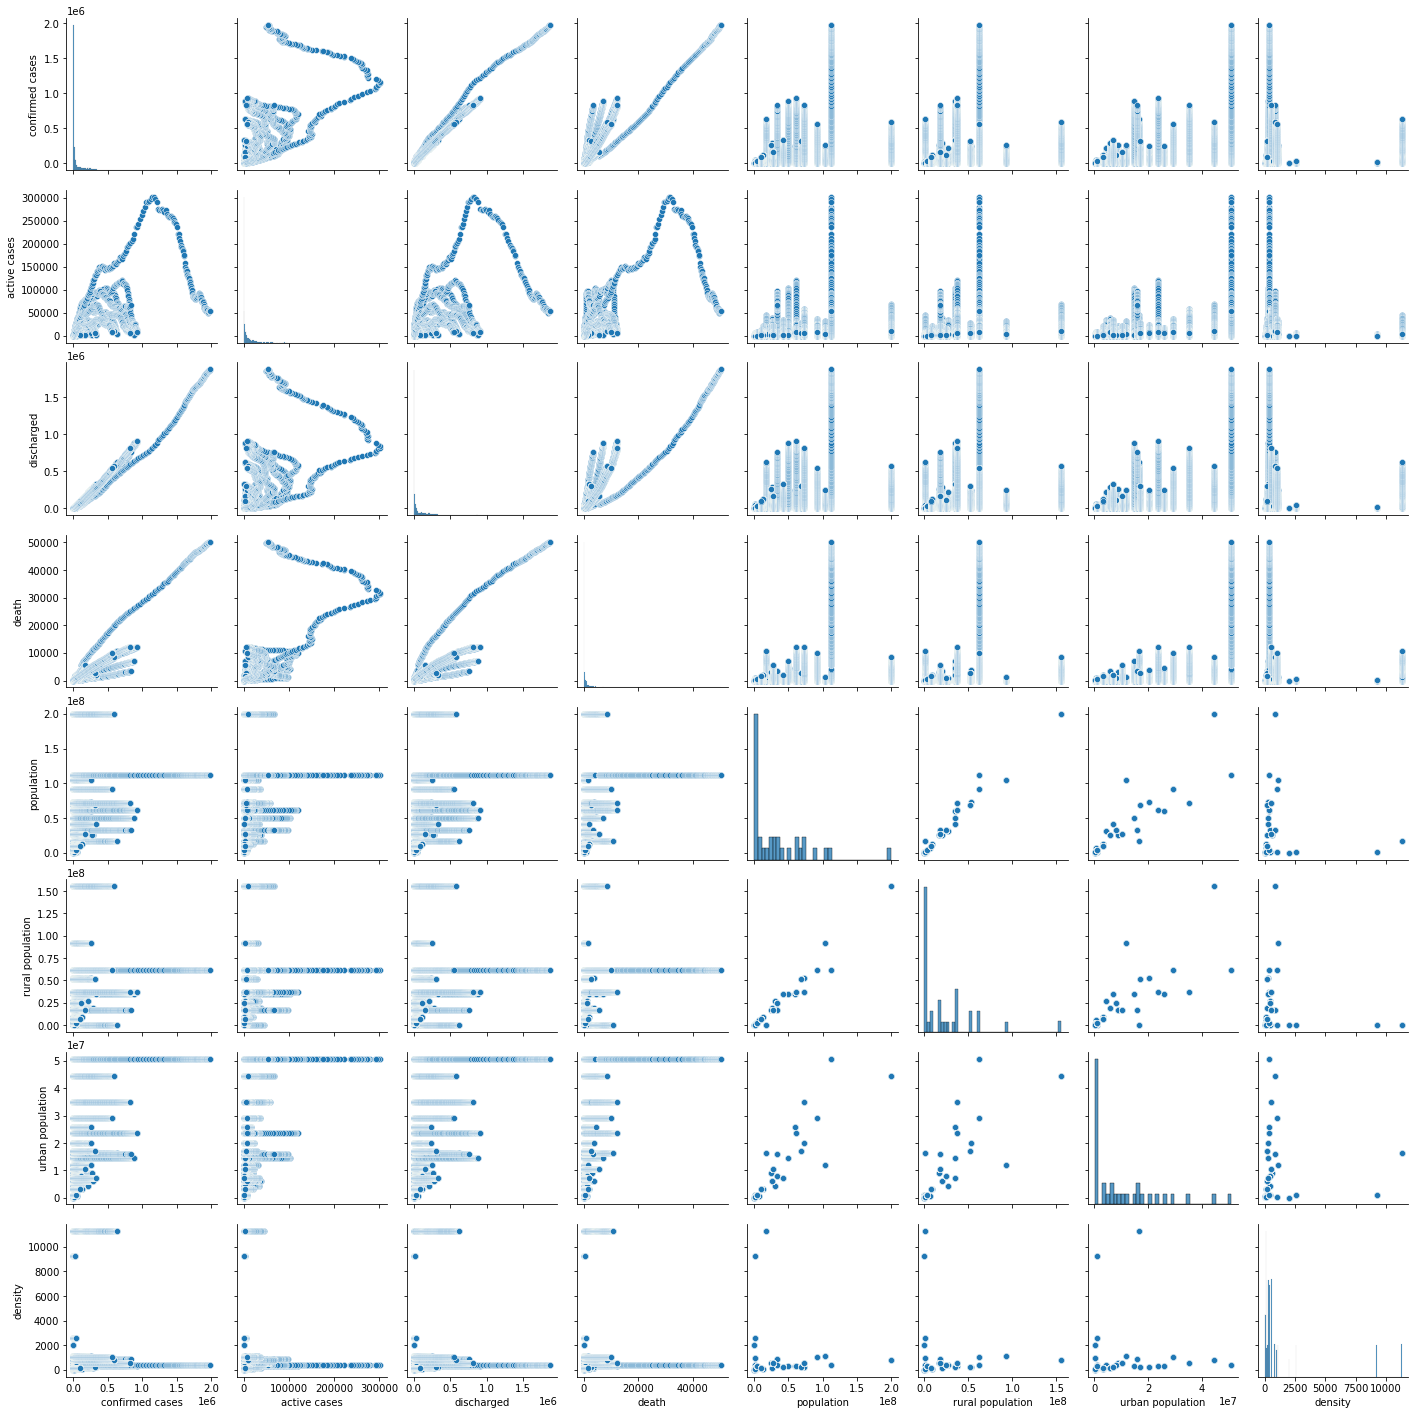

In [92]:
sns.pairplot(dfnew)

In [ ]:
# For getting the best way of correlation let us check the heat map.

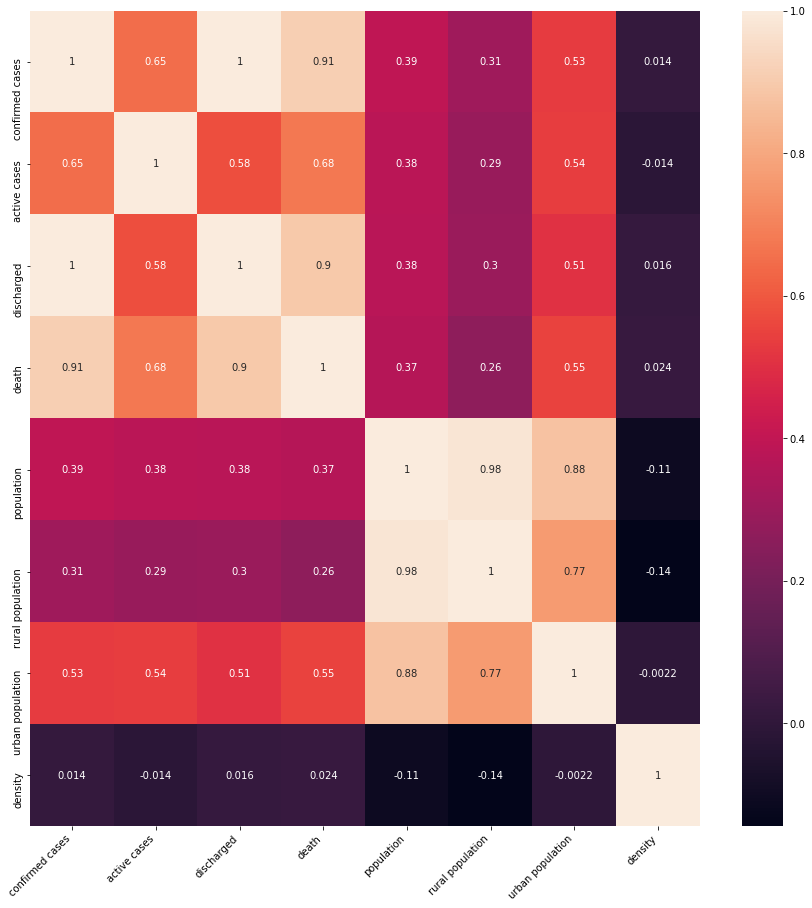

In [93]:
#Heat map of the data

plt.figure(figsize=(15,15))
hm = sns.heatmap(dfnew.corr(), annot=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right');

Here we have clearly noticed that compared to confirmed cases, active cases, discharged and death are highly correlated.

In [ ]:
# Let us check the scatterplot for the highly correlated columns.

<AxesSubplot:xlabel='confirmed cases', ylabel='active cases'>

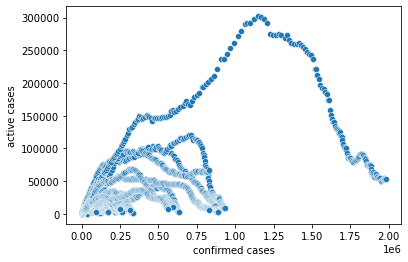

In [94]:
# Calling the scatterplot method with : x = 'confirmed cases', y = 'active cases'

sns.scatterplot(x="confirmed cases", y="active cases", data=dfnew)

<AxesSubplot:xlabel='confirmed cases', ylabel='active cases'>

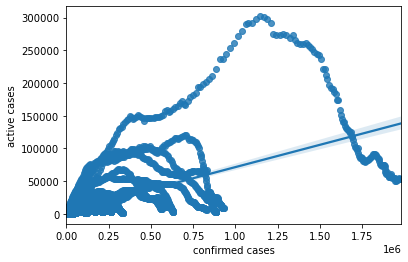

In [95]:
# Calling the regplot method on sns object with parameters: x = 'confirmed cases', y = 'active cases'

sns.regplot(x="confirmed cases", y="active cases", data=dfnew)

We can see the positive correlation. The line almost matches the data.

<AxesSubplot:xlabel='confirmed cases', ylabel='discharged'>

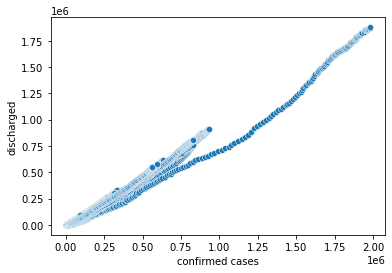

In [96]:
# Calling the scatterplot method with : x = 'confirmed cases', y = 'discharged'

sns.scatterplot(x="confirmed cases", y="discharged", data=dfnew)

<AxesSubplot:xlabel='confirmed cases', ylabel='discharged'>

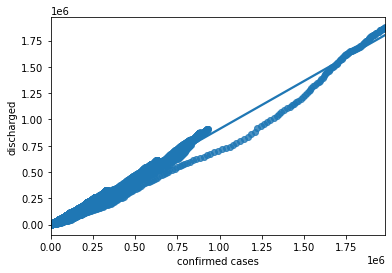

In [97]:
# Calling the regplot method on sns object with parameters: x = 'confirmed cases', y = 'discharged'

sns.regplot(x="confirmed cases", y="discharged", data=dfnew)

Here we can clearly see the positive correlation and  very less number of points deviate from the line.

<AxesSubplot:xlabel='confirmed cases', ylabel='death'>

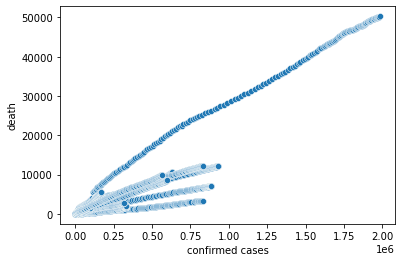

In [98]:
# Calling the scatterplot method with : x = 'confirmed cases', y = 'death'

sns.scatterplot(x="confirmed cases", y="death", data=dfnew)

<AxesSubplot:xlabel='confirmed cases', ylabel='death'>

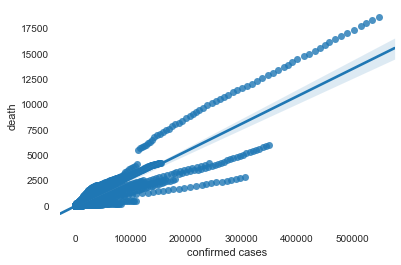

In [43]:
# Calling the regplot method on sns object with parameters: x = 'confirmed cases', y = 'death'

sns.regplot(x="confirmed cases", y="death", data=dfnew)

Here majority of our points deviate from the line rather than clustering close.

# Feature Engineering

In [99]:
dfnew['density'].describe()

count    10154.000000
mean      1049.811759
std       2398.472745
min          2.800000
25%        123.000000
50%        319.000000
75%        573.000000
max      11297.000000
Name: density, dtype: float64

In [100]:
#By using binning we have labeled the density of all the regions and categorized to "LOW","MID" & "HIGH"

dfnew['density']=pd.cut(dfnew['density'],bins=[0,500,1000,12000],labels=["Low","Mid","High"])

In [101]:
dfnew[dfnew['date']=='18/08/2020']

,date,region,confirmed cases,active cases,discharged,death,population,rural population,urban population,density
144,18/08/2020,Andaman and Nicobar Islands,2445,1091,1325,29,380581,237093,143488,Low
451,18/08/2020,Andhra Pradesh,296609,84777,209100,2732,49577103,34966693,14610410,Low
736,18/08/2020,Arunachal Pradesh,2741,843,1893,5,1383727,1066358,317369,Low
1022,18/08/2020,Assam,79667,22736,56734,197,31205576,26807034,4398542,Low
1319,18/08/2020,Bihar,106307,29387,76452,468,104099452,92341436,11758016,High
1619,18/08/2020,Chandigarh,2216,1003,1183,30,1055450,28991,1026459,High
1918,18/08/2020,Chhattisgarh,16025,5277,10598,150,25545198,19607961,5937237,Low
2167,18/08/2020,Dadra and Nagar Haveli and Daman and Diu,1908,447,1459,2,585764,243510,342254,Mid
2474,18/08/2020,Delhi,153367,10852,138301,4214,16787941,419042,16368899,High
2767,18/08/2020,Goa,11994,3825,8058,111,1458545,551731,906814,Low


In [102]:
# Encoding the density bin value, so dataframe can read the value in numeric.

dfa1=pd.get_dummies(dfnew, columns=['density'],drop_first=True, prefix='C')

In [103]:
dfa1

,date,region,confirmed cases,active cases,discharged,death,population,rural population,urban population,C_Mid,C_High
0,27/03/2020,Andaman and Nicobar Islands,1,1,0,0,380581,237093,143488,0,0
1,28/03/2020,Andaman and Nicobar Islands,6,6,0,0,380581,237093,143488,0,0
2,29/03/2020,Andaman and Nicobar Islands,9,9,0,0,380581,237093,143488,0,0
3,30/03/2020,Andaman and Nicobar Islands,9,9,0,0,380581,237093,143488,0,0
4,31/03/2020,Andaman and Nicobar Islands,10,10,0,0,380581,237093,143488,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10149,11/01/2121,West Bengal,560709,7881,542887,9941,91276115,62183113,29093002,0,1
10150,12/01/2121,West Bengal,561321,7538,543826,9957,91276115,62183113,29093002,0,1
10151,13/01/2121,West Bengal,562072,7392,544705,9975,91276115,62183113,29093002,0,1
10152,14/01/2121,West Bengal,562795,7303,545499,9993,91276115,62183113,29093002,0,1


In [104]:
dfa1.columns

Index(['date', 'region', 'confirmed cases', 'active cases', 'discharged',
       'death', 'population', 'rural population', 'urban population', 'C_Mid',
       'C_High'],
      dtype='object')

# Modeling

In [107]:
#  Here our explanatory variable consists ['active cases', 'discharged','death', 'population','C_Mid','C_High'].
# Dependent variable is 'confirmed cases'
# Using train test split method we have trained and tested our data.

X1 = dfa1[['active cases', 'discharged',
       'death', 'population','C_Mid',
       'C_High']]
y1 = dfa1['confirmed cases']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 123)

In [108]:
# Checking the shape of training and testing data.

print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(7107, 6) (7107,)
(3047, 6) (3047,)


In [111]:
# Creating linear regression model.

mod = linear_model.LinearRegression(normalize=True)

In [113]:
# Fitting our dataset.

mod.fit(X_train1, y_train1)

LinearRegression(normalize=True)

In [116]:
# Calculating the rscore and finding the R-squared coefficient for checking the model's accuracy.

rscore = mod.score(X_train1, y_train1)

print("The R-Squared coefficent is: {}".format(rscore))

The R-Squared coefficent is: 1.0


In [118]:
# Predicting y value from testing data.

y_pred1 = mod.predict(X_test1)

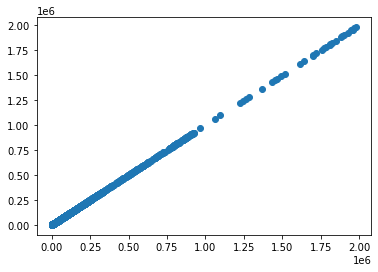

In [119]:
# Visualizing the predicted value with testing data.

plt.scatter(y_test1, y_pred1)